In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('timesData.csv')
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [3]:
# Veri kümesinde toplam kaç üniversite bulunmaktadır? -1 
# Veri kümesi hangi yıllar arasını kapsamaktadır?  - 2
# Hangi ülkede en fazla üniversite bulunmaktadır? - 3
# Ortalama student_staff_ratio değeri nedir? - 4 
# Görselleştirme: country bazında üniversite sayısını gösteren bir sütun grafiği çiziniz. - 5
# female_male_ratio ortalaması nedir? -6
# total_score değeri 90'ın üzerinde olan üniversitelerin sayısı nedir? - 7
# Görselleştirme: Farklı year değerleri için teaching puanlarının dağılımını gösteren bir kutu grafiği çiziniz. - 8 
# Hangi ülkede en yüksek international_students oranına sahip üniversite bulunmaktadır? - 9 
# Ortalama income değeri nedir? - 10
# Hangi üniversite en yüksek research puanına sahip? - 1
# Hangi ülkede yer alan üniversiteler en yüksek ortalama total_score değerine sahiptir? -2
# world_rank 1-100 arasında olan üniversitelerin ortalama international puanı nedir? -3 
# Görselleştirme: En yüksek 10 teaching puanına sahip üniversiteleri ve bu puanları gösteren bir bar grafiği oluşturunuz. -4 
# Hangi üniversiteler ortalamanın üzerinde citations puanına sahip? -5 
# num_students değeri 50.000'in üzerinde olan üniversitelerin sayısı nedir? -6 
# Hangi ülkede en yüksek student_staff_ratio değerine sahip üniversite bulunmaktadır? - 7 
# Görselleştirme: Üniversitelerin female_male_ratio değerlerini gösteren bir histogram oluşturunuz. - 8 
# world_rank değeri 50'nin altında olan üniversitelerin ortalama income değeri nedir?- 9
# international_students oranı %30'un üzerinde olan üniversitelerin sayısı nedir? - 10

In [4]:
# 1.Soru:
df['university_name'].nunique()

# len(df['university_name'].unique())

818

In [5]:
# 2.Soru:
# Veri kümesi hangi yıllar arasını kapsamaktadır? 
print(df['year'].min())
df['year'].max()

2011


2016

In [6]:
# 3. Soru:
# Hangi ülkede en fazla üniversite bulunmaktadır?

max_univercity_country = ''
max_univercity_count = 0

for country in df.country.unique():
    univercity_count = df[df['country'] == country]['university_name'].nunique()
    if univercity_count > max_univercity_count:
        max_univercity_count = univercity_count
        max_univercity_country = country
        
print(f'En çok üniversite {max_univercity_country} ülkesinde bulunuyor ve {max_univercity_count} adet üniversite mevcut.')

En çok üniversite United States of America ülkesinde bulunuyor ve 161 adet üniversite mevcut.


In [7]:
# 4.Soru:
# Ortalama student_staff_ratio değeri nedir?
df['student_staff_ratio'].mean()

18.445283018867926

In [8]:
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [9]:
df.groupby("country")["university_name"].nunique().reset_index() # Bunu anlamadım.

,country,university_name
0,Argentina,1
1,Australia,31
2,Austria,7
3,Bangladesh,1
4,Belarus,1
...,...,...
67,Unisted States of America,1
68,United Arab Emirates,2
69,United Kingdom,78
70,United States of America,161


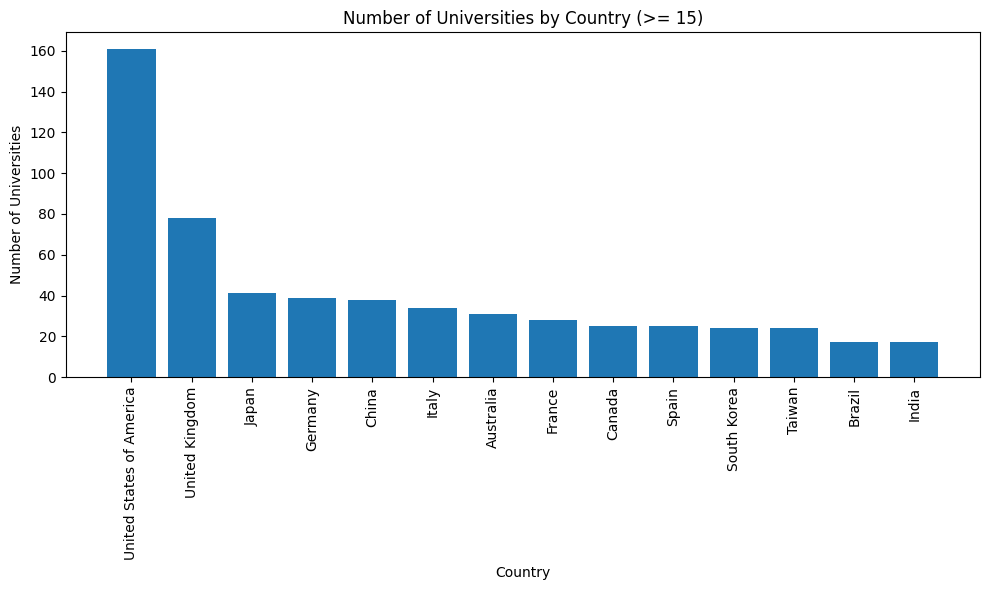

In [10]:
# 5.Soru:
# Görselleştirme: country bazında üniversite sayısını gösteren bir sütun grafiği çiziniz. - 5

university_counts = df.groupby("country")["university_name"].nunique()

university_counts_filtered = university_counts[university_counts.values >= 15]

university_counts_filtered_sorted = university_counts_filtered.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(university_counts_filtered_sorted.index, university_counts_filtered_sorted.values)
plt.xlabel("Country")
plt.ylabel("Number of Universities")
plt.title("Number of Universities by Country (>= 15)")
plt.xticks(rotation= 90)  # Eksen etiketlerini döndürmek için
plt.tight_layout()
plt.show()

In [11]:
df.female_male_ratio.unique()

array([nan, '33 : 67', '37 : 63', '42 : 58', '45 : 55', '46 : 54',
       '50 : 50', '52 : 48', '48 : 52', '31 : 69', '51 : 49', '39 : 61',
       '53 : 47', '56 : 44', '49 : 51', '20 : 80', '54 : 46', '58 : 42',
       '47 : 53', '55 : 45', '18 : 82', '70 : 30', '44 : 56', '27 : 73',
       '32 : 68', '62 : 38', '57 : 43', '61 : 39', '66 : 34', '30 : 70',
       '13 : 87', '19 : 81', '59 : 41', '25 : 75', '60 : 40', '26 : 74',
       '67 : 33', '41 : 59', '63 : 37', '29 : 71', '35 : 65', '28 : 72',
       '65 : 35', '38 : 62', '34 : 66', '43 : 57', '16 : 84', '64 : 36',
       '36 : 64', '12 : 88', '15 : 85', '17 : 83', '24 : 76', '100 : 0',
       '40 : 60', '77 : 23', '71 : 29', '69 : 31', '22 : 78', '23 : 77',
       '-', '14 : 86', '78 : 22', '76 : 24', '21 : 79', '11 : 89',
       '68 : 32', '1 : 99', '74 : 26', '9 : 91'], dtype=object)

In [12]:
# 6.Soru:
# female_male_ratio ortalaması nedir?

df['female_male_ratio'] = df['female_male_ratio'].replace('-', np.nan)

split_ratio = df['female_male_ratio'].str.split(":")

female = split_ratio.str[0].astype(float)

male = split_ratio.str[1].astype(float)

male = male.replace(0, 1)

df['female_male_ratio'] = female / male

mean_ratio = df['female_male_ratio'].mean()

print("female_male_ratio Sütununun Ortalaması:", mean_ratio)

female_male_ratio Sütununun Ortalaması: 1.152038731847361


In [13]:
# 7.Soru:
# total_score değeri 90'ın üzerinde olan üniversitelerin sayısı nedir? 

In [14]:
df['total_score'] = df['total_score'].replace('-' , np.nan)

df['total_score'] = df['total_score'].astype(float)

df[df['total_score'] > 90]['university_name'].nunique()

10

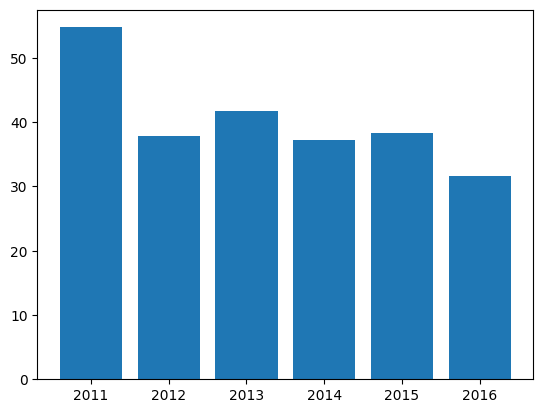

In [15]:
# 8.Soru:
# Görselleştirme: Farklı year değerleri için teaching puanlarının dağılımını gösteren bir kutu grafiği çiziniz.

df.groupby('year')['teaching'].mean()

plt.bar(x= df.groupby('year')['teaching'].mean().index , height= df.groupby('year')['teaching'].mean().values);

In [16]:
# 9.Soru:
# Hangi ülkede en yüksek international_students oranına sahip üniversite bulunmaktadır? - 9 

df['international_students'] = df['international_students'].str.replace('%' , '')
df['international_students'] = df['international_students'].astype(float)

df[df['international_students'] == df['international_students'].max()]['university_name']

2411    American University of Sharjah
Name: university_name, dtype: object

In [17]:
# 10.Soru:
# Ortalama income değeri nedir?
df['income'] = df['income'].replace('-' , np.nan)

df['income'] = df['income'].astype(float)

df['income'].mean()

48.979874213836474

In [18]:
# Soru 11:
# Hangi üniversite(ler) en yüksek research puanına sahip? 

df[df['research'] == df['research'].max()]['university_name']

209    University of California, Berkeley
602    California Institute of Technology
607                  Princeton University
Name: university_name, dtype: object

In [19]:
# Soru 12:
# Hangi ülkede yer alan üniversiteler en yüksek ortalama total_score değerine sahiptir?
# df['total_score'] = df['total_score'].replace('-' , np.nan)

# df['total_score'] = df['total_score'].astype(float)

df.dropna(subset=['total_score']).groupby('country')['total_score'].mean().idxmax()

'Singapore'

In [20]:
# Soru 13:
# world_rank 1-100 arasında olan üniversitelerin ortalama international puanı nedir?

df['world_rank'] = df['world_rank'].str.replace('=' , '').apply(lambda x: (sum(map(int, x.split('-'))) / 2) if '-' in x else x).astype(float)

df['international'] = df['international'].replace('-' , np.nan)
df['international'] = df['international'].astype(float)

df[df['world_rank'].between(1,100)]['international'].mean()

60.21003344481605

In [21]:
# df['world_rank'] = df['world_rank'].str.replace('=' , '')
# df['world_rank'] = df['world_rank'].apply(lambda x: (sum(map(int, x.split('-'))) / 2) if '-' in x else x)
# df['world_rank'] = df['world_rank'].astype(float)

# df['international'] = df['international'].replace('-' , np.nan)
# df['international'] = df['international'].astype(float)

# df[df['world_rank'].between(1,100)]['international'].mean()

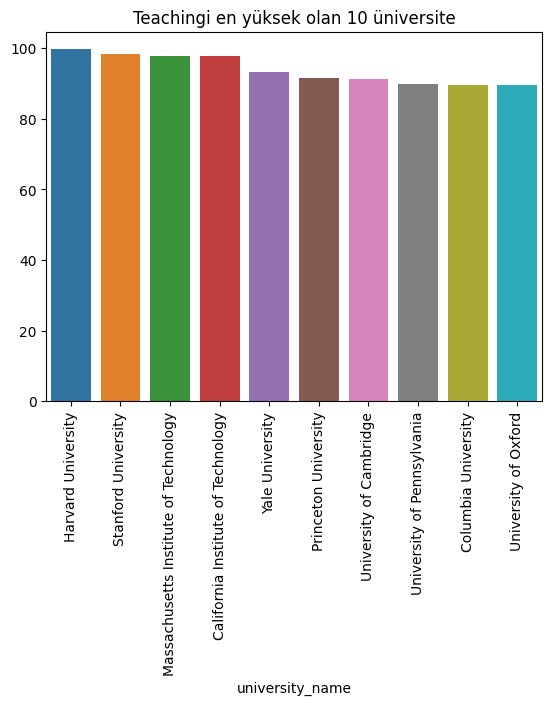

In [22]:
# Soru 14:
# Görselleştirme: En yüksek 10 teaching puanına sahip üniversiteleri ve bu puanları gösteren bir bar grafiği oluşturunuz.
enyüksek10 = df.groupby('university_name')['teaching'].max().sort_values(ascending=False).head(10)

sns.barplot(x = enyüksek10.index , y= enyüksek10.values)
plt.xticks(rotation= 90)
plt.title('Teachingi en yüksek olan 10 üniversite')
plt.show()

In [23]:
# Soru 15:
# Hangi üniversiteler ortalamanın üzerinde citations puanına sahip?
mean_citiations = df['citations'].mean()

df[df['citations'] > mean_citiations]['university_name'].unique()

array(['Harvard University', 'California Institute of Technology',
       'Massachusetts Institute of Technology', 'Stanford University',
       'Princeton University', 'University of Cambridge',
       'University of Oxford', 'University of California, Berkeley',
       'Imperial College London', 'Yale University',
       'University of California, Los Angeles', 'University of Chicago',
       'Johns Hopkins University', 'Cornell University',
       'ETH Zurich – Swiss Federal Institute of Technology Zurich',
       'University of Michigan', 'University of Toronto',
       'Columbia University', 'University of Pennsylvania',
       'Carnegie Mellon University', 'University of Hong Kong',
       'University College London', 'University of Washington',
       'Duke University', 'Northwestern University',
       'Georgia Institute of Technology',
       'Pohang University of Science and Technology',
       'University of California, Santa Barbara',
       'University of British Columbia'

In [24]:
# Soru 16:
# num_students değeri 50.000'in üzerinde olan üniversitelerin sayısı nedir?
df['num_students'] = df['num_students'].str.replace(',' , '').astype(float)

df[df['num_students'] > 50000].shape[0]

141

In [25]:
# Soru 17:
# Hangi ülkede en yüksek student_staff_ratio değerine sahip üniversite bulunmaktadır?

df[df['student_staff_ratio'] == df['student_staff_ratio'].max()]['country'].values[0]

'Turkey'

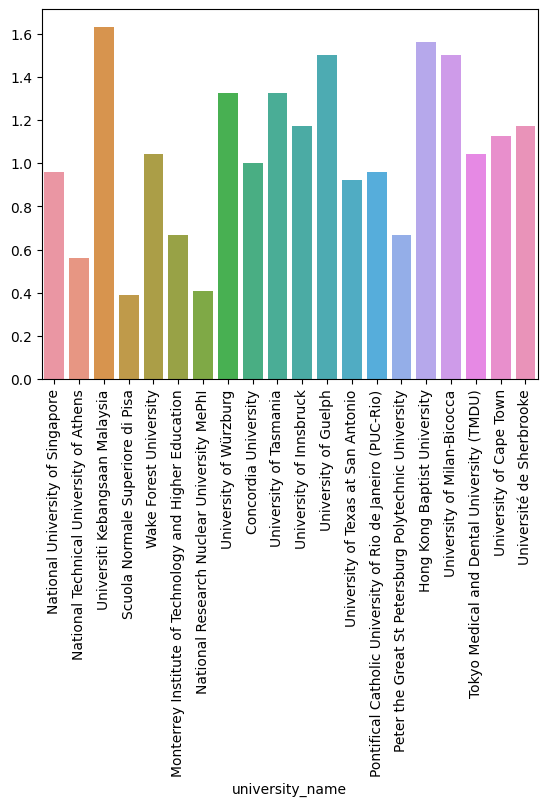

In [26]:
# Soru 18:
# Görselleştirme: Üniversitelerin female_male_ratio değerlerini gösteren bir histogram oluşturunuz. 
# (üniversite isimleri kategorik olduğu için barplot daha uygundu ve biz de barplot çizdik.)
# Çok fazla üniversite olduğu için bütün hepsini gösterirsek karışık görüntü çıkıyordu biz de rastgele 20 üniversitenin female-male oranlarını gösterdik.

sub_serie = df.dropna(subset=['female_male_ratio']).groupby('university_name')['female_male_ratio'].mean().sample(20)
sns.barplot(x = sub_serie.index , y = sub_serie.values)
plt.xticks(rotation= 90)
plt.show()

In [27]:
# Soru 19:
# world_rank değeri 50'nin altında olan üniversitelerin ortalama income değeri nedir?

df[df['world_rank'] < 50].dropna(subset=['income']).groupby('university_name')['income'].mean() # İlk 50'deki her bir üniversitenin tek tek ortalama income değeri.

university_name
Australian National University                41.250000
Brown University                              34.900000
California Institute of Technology            92.400000
Carnegie Mellon University                    55.550000
Cornell University                            35.480000
                                                ...    
University of Wisconsin-Madison               53.650000
Wageningen University and Research Center    100.000000
Yale University                               39.380000
École Normale Supérieure                      30.700000
École Polytechnique Fédérale de Lausanne      51.833333
Name: income, Length: 61, dtype: float64

In [28]:
# Soru 20:
# international_students oranı %30'un üzerinde olan üniversitelerin sayısı nedir?

df[df['international_students'] > 30].shape[0]

254

In [29]:
# Hazırlayanlar Grup 2:
# - Emincan Yılmaz
# - Turan Şahin Topçuoğlu
# - Mert Taş
# - Mert ...

In [30]:
# Bitti.